In [8]:
import pandas as pd

#importa dataset
file_path = '/Users/waltermanni/Desktop/APT Data/Titanka Data/APT - Prenotazioni al 31-07.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Creazione del DataFrame per l'anno 2023
prenotazioni_2023 = df[['Frazione.1', 'Prenotazione - data arrivo Mese.1',
                        'Prenotazione - data Partenza Mese.1', 'Prenotazioni.1', 'Ricavi.1', 'Anno.1']]

# Rinominazione delle colonne per uniformità
prenotazioni_2023.columns = ['Frazione', 'Prenotazione - data arrivo Mese',
                             'Prenotazione - data Partenza Mese', 'Prenotazioni', 'Ricavi', 'Anno']

# Creazione del DataFrame per l'anno 2024
prenotazioni_2024 = df[['Frazione', 'Prenotazione - data arrivo Mese',
                        'Prenotazione - data Partenza Mese', 'Prenotazioni', 'Ricavi', 'Anno']]

# Unione dei DataFrame dei due anni
prenotazioni_totali = pd.concat([prenotazioni_2023, prenotazioni_2024], ignore_index=True)

# Funzione per pulire correttamente i campi monetari
def clean_monetary_value(value):
    if isinstance(value, str):
        # Rimuove i punti come separatori delle migliaia e sostituisce la virgola con il punto per i decimali
        return float(value.replace('.', '').replace(',', '.'))
    return value

# Applica la funzione ai campi monetari (ricavi)
prenotazioni_totali['Ricavi'] = prenotazioni_totali['Ricavi'].apply(clean_monetary_value)

# Mostra i primi record per la verifica
prenotazioni_totali.head()


,Frazione,Prenotazione - data arrivo Mese,Prenotazione - data Partenza Mese,Prenotazioni,Ricavi,Anno
0,Riccione,6.0,6.0,286.0,98625.27,2023.0
1,Riccione,6.0,6.0,89.0,30288.77,2023.0
2,Riccione,6.0,6.0,42.0,6575.33,2023.0
3,Riccione,6.0,6.0,6.0,6328.68,2023.0
4,Riccione,6.0,6.0,6.0,8783.60,2023.0


In [10]:
prenotazioni_totali.columns

Index(['Frazione', 'Prenotazione - data arrivo Mese',
       'Prenotazione - data Partenza Mese', 'Prenotazioni', 'Ricavi', 'Anno'],
      dtype='object')

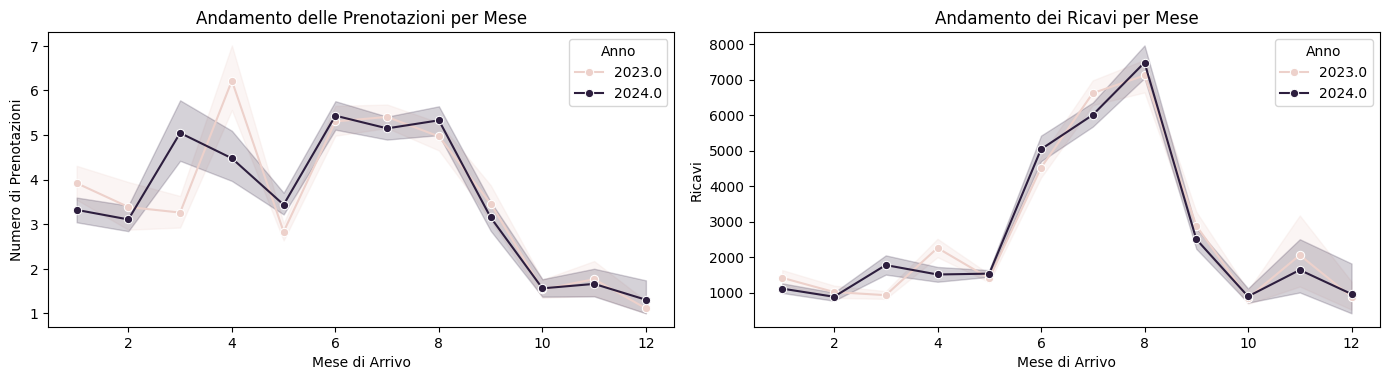

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impostazioni di default per la visualizzazione dei grafici
plt.figure(figsize=(14, 7))

# Grafico Lineare: Andamento delle prenotazioni per mese e anno
plt.subplot(2, 2, 1)
sns.lineplot(data=prenotazioni_totali, x='Prenotazione - data arrivo Mese', y='Prenotazioni', hue='Anno', marker='o')
plt.title('Andamento delle Prenotazioni per Mese')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Numero di Prenotazioni')

# Grafico Lineare: Andamento dei ricavi per mese e anno
plt.subplot(2, 2, 2)
sns.lineplot(data=prenotazioni_totali, x='Prenotazione - data arrivo Mese', y='Ricavi', hue='Anno', marker='o')
plt.title('Andamento dei Ricavi per Mese')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Ricavi')

# Adatta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()



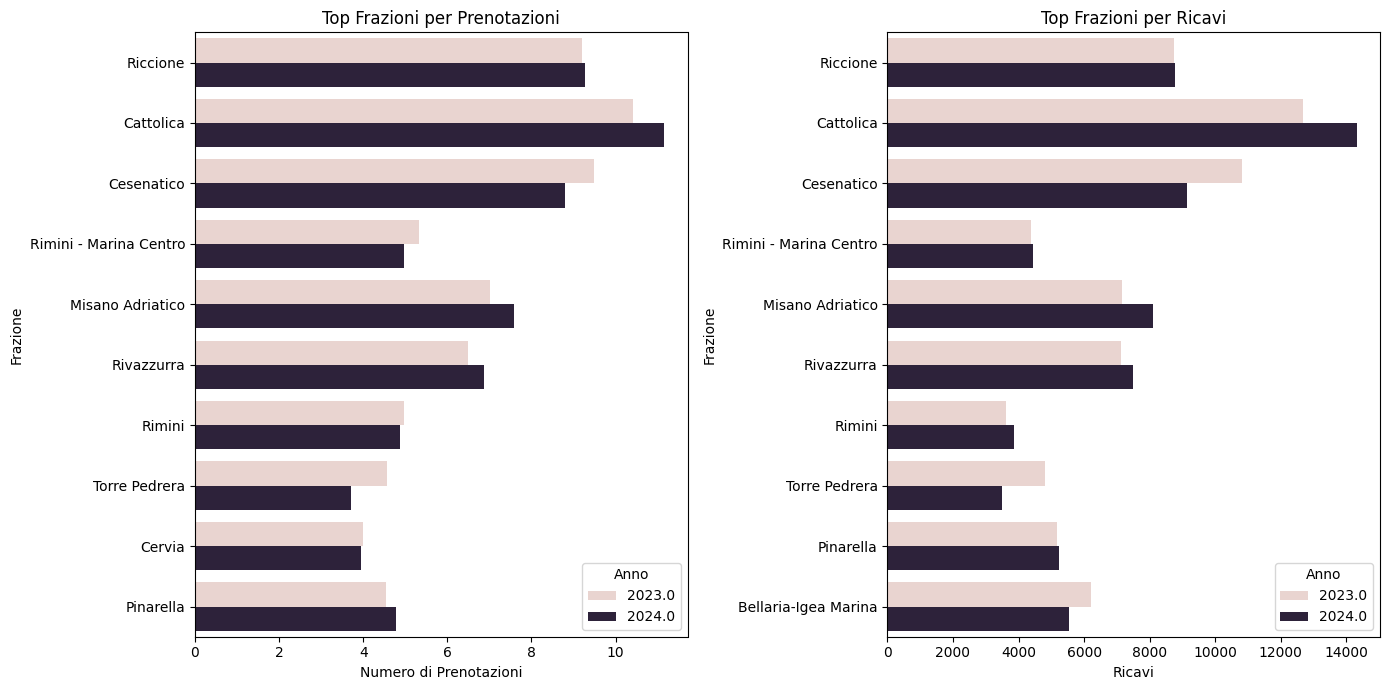

In [15]:
# Definiamo il numero massimo di frazioni da visualizzare
top_n = 10

# Trova le frazioni con il maggior numero di prenotazioni
top_prenotazioni = prenotazioni_totali.groupby('Frazione')['Prenotazioni'].sum().nlargest(top_n).index
top_ricavi = prenotazioni_totali.groupby('Frazione')['Ricavi'].sum().nlargest(top_n).index

# Filtra solo le frazioni top per le prenotazioni e ricavi
df_top_prenotazioni = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_prenotazioni)]
df_top_ricavi = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_ricavi)]

# Grafico a Barre Orizzontali: Top Prenotazioni per Frazione
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(data=df_top_prenotazioni, y='Frazione', x='Prenotazioni', hue='Anno', errorbar=None)
plt.title('Top Frazioni per Prenotazioni')
plt.xlabel('Numero di Prenotazioni')
plt.ylabel('Frazione')

# Grafico a Barre Orizzontali: Top Ricavi per Frazione
plt.subplot(1, 2, 2)
sns.barplot(data=df_top_ricavi, y='Frazione', x='Ricavi', hue='Anno', errorbar=None)
plt.title('Top Frazioni per Ricavi')
plt.xlabel('Ricavi')
plt.ylabel('Frazione')

plt.tight_layout()
plt.show()


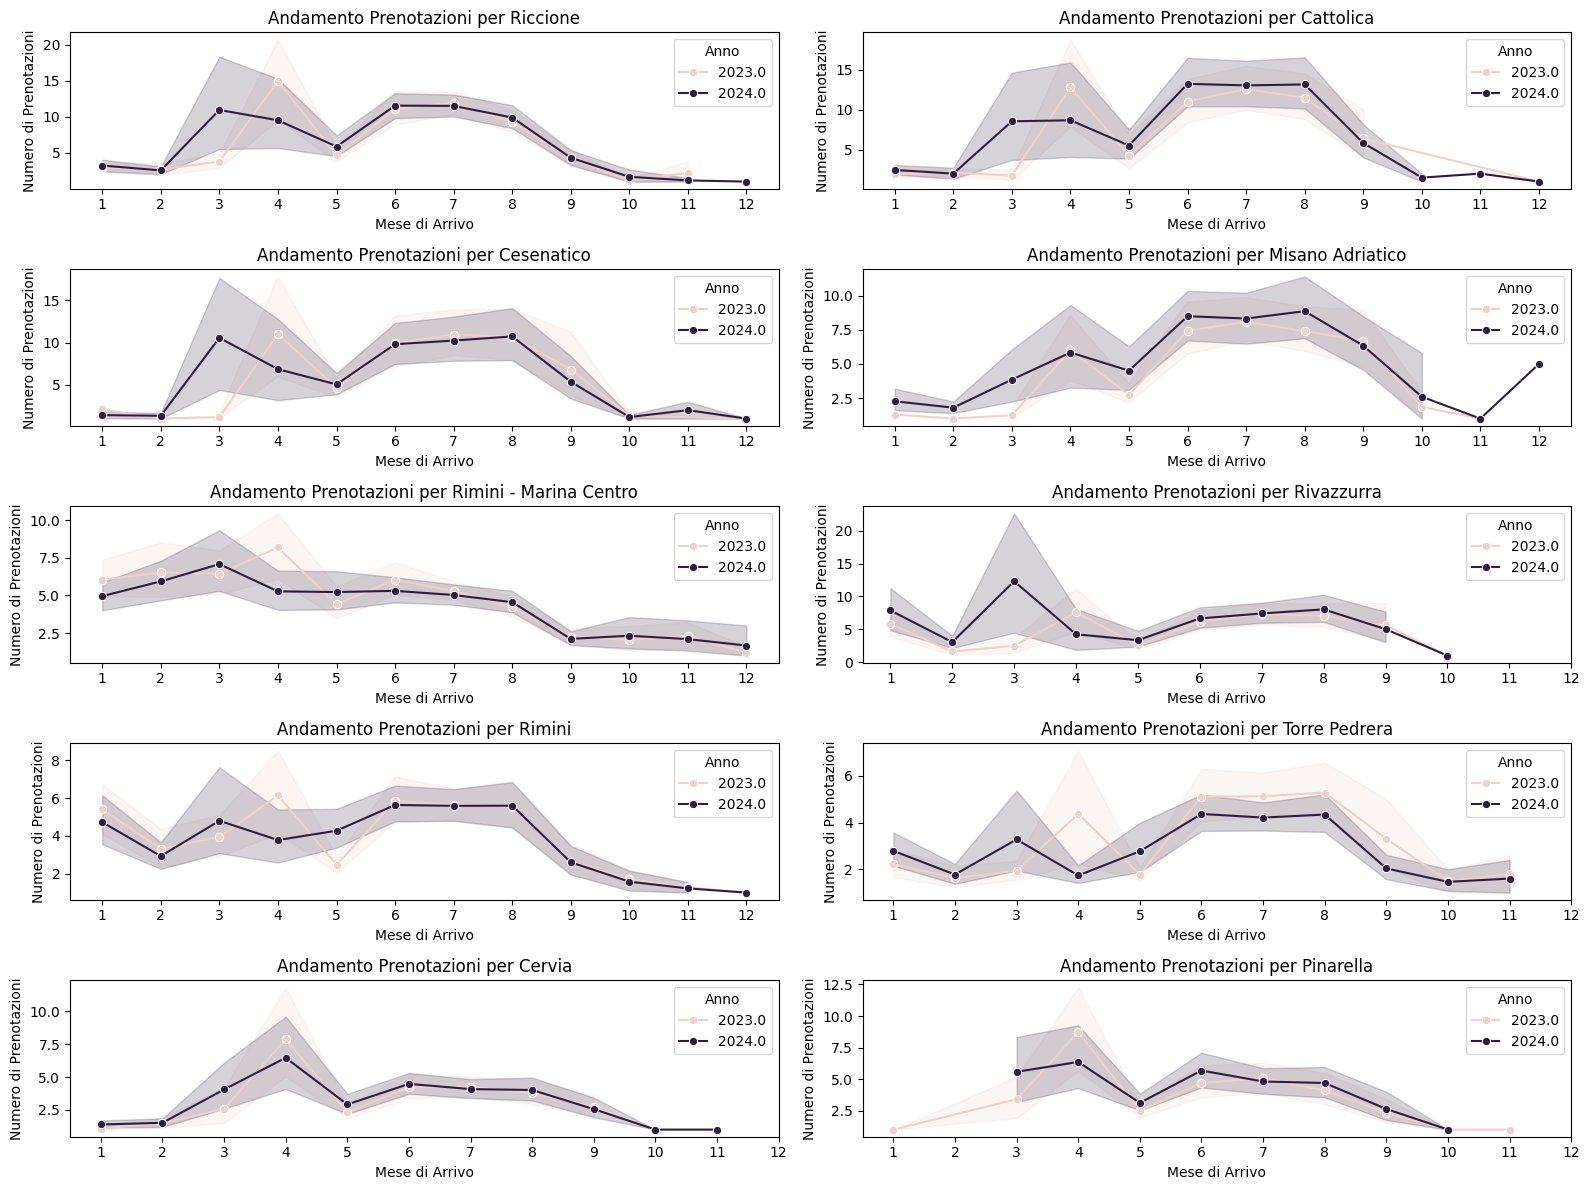

In [18]:
# Seleziona le top 10 frazioni con il maggior numero di prenotazioni
top_frazioni_prenotazioni = prenotazioni_totali.groupby('Frazione')['Prenotazioni'].sum().nlargest(10).index
df_top_frazioni = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_frazioni_prenotazioni)]

# Imposta la figura per i grafici
plt.figure(figsize=(16, 12))

# Itera attraverso le frazioni top e crea un grafico per ciascuna
for i, frazione in enumerate(top_frazioni_prenotazioni):
    plt.subplot(5, 2, i + 1)  # Organizza i grafici in 5 righe e 2 colonne
    sns.lineplot(data=df_top_frazioni[df_top_frazioni['Frazione'] == frazione],
                 x='Prenotazione - data arrivo Mese', y='Prenotazioni', hue='Anno', marker='o')
    plt.title(f'Andamento Prenotazioni per {frazione}')
    plt.xlabel('Mese di Arrivo')
    plt.ylabel('Numero di Prenotazioni')
    plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x

plt.tight_layout()
plt.show()



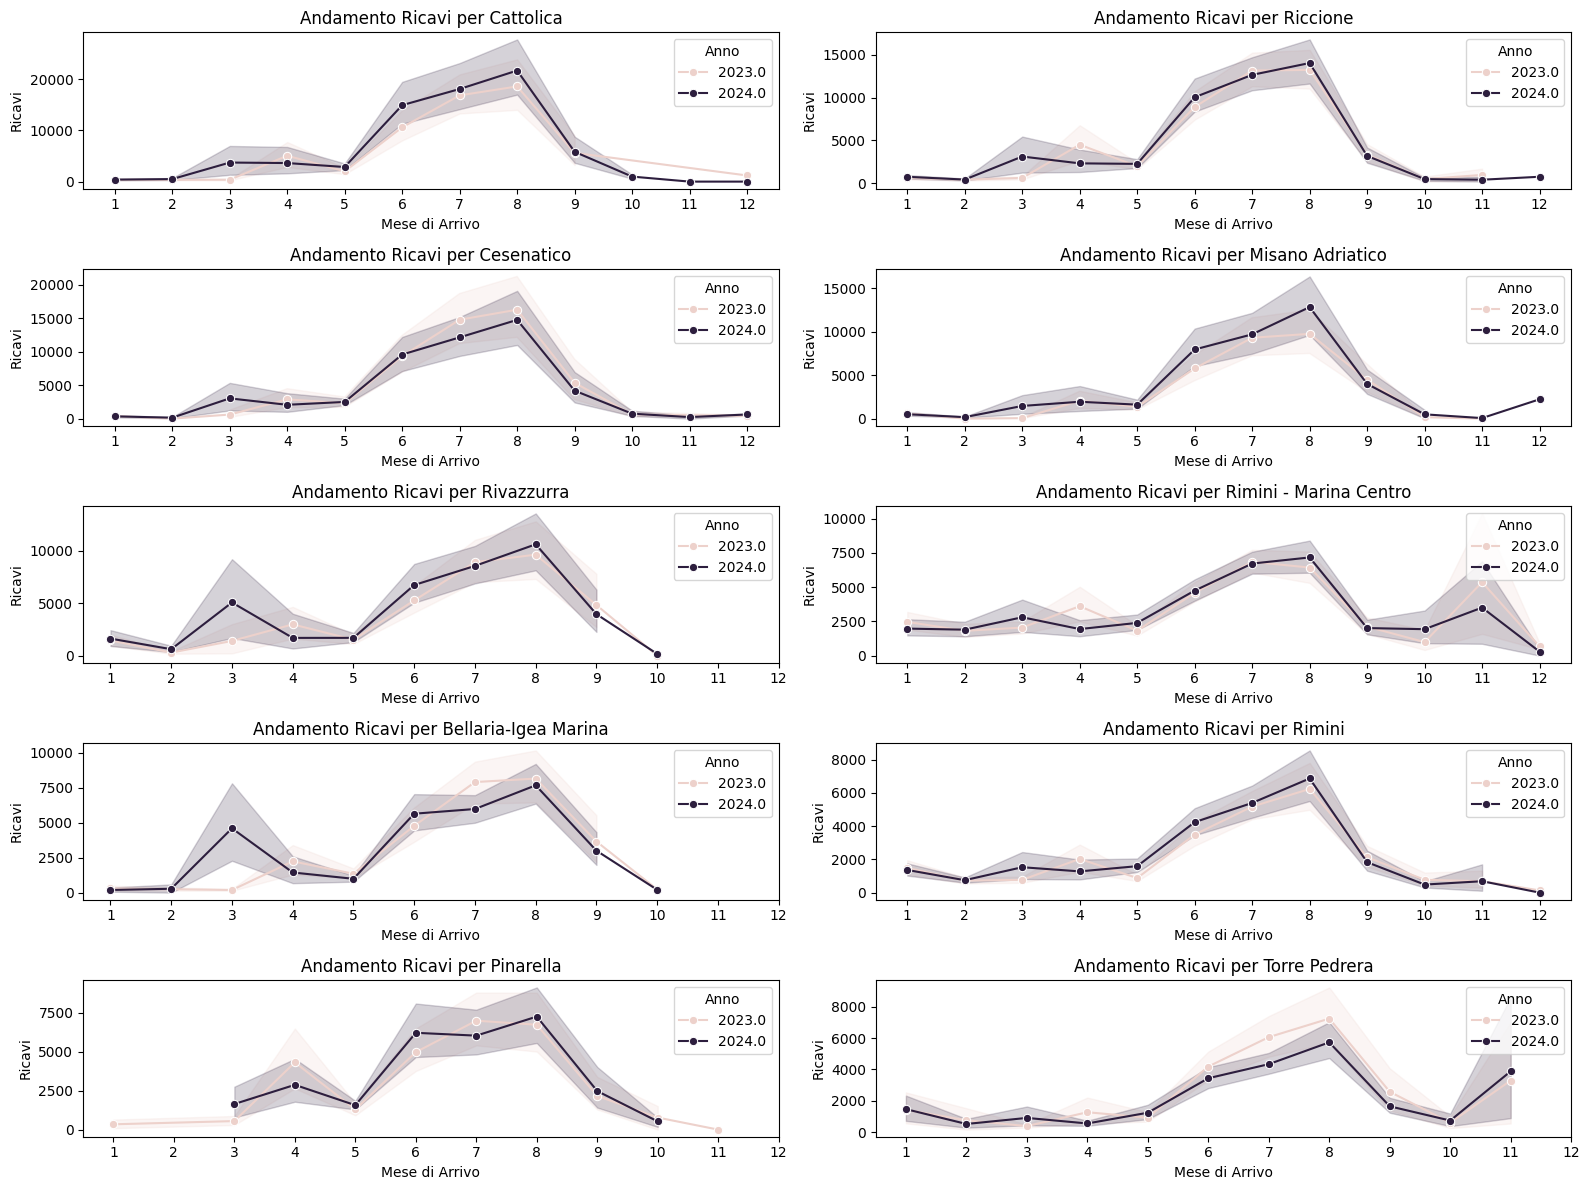

In [19]:
# Seleziona le top 10 frazioni con i maggiori ricavi
top_frazioni_ricavi = prenotazioni_totali.groupby('Frazione')['Ricavi'].sum().nlargest(10).index
df_top_frazioni_ricavi = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_frazioni_ricavi)]

# Imposta la figura per i grafici
plt.figure(figsize=(16, 12))

# Itera attraverso le frazioni top e crea un grafico per ciascuna
for i, frazione in enumerate(top_frazioni_ricavi):
    plt.subplot(5, 2, i + 1)  # Organizza i grafici in 5 righe e 2 colonne
    sns.lineplot(data=df_top_frazioni_ricavi[df_top_frazioni_ricavi['Frazione'] == frazione],
                 x='Prenotazione - data arrivo Mese', y='Ricavi', hue='Anno', marker='o')
    plt.title(f'Andamento Ricavi per {frazione}')
    plt.xlabel('Mese di Arrivo')
    plt.ylabel('Ricavi')
    plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x

plt.tight_layout()
plt.show()


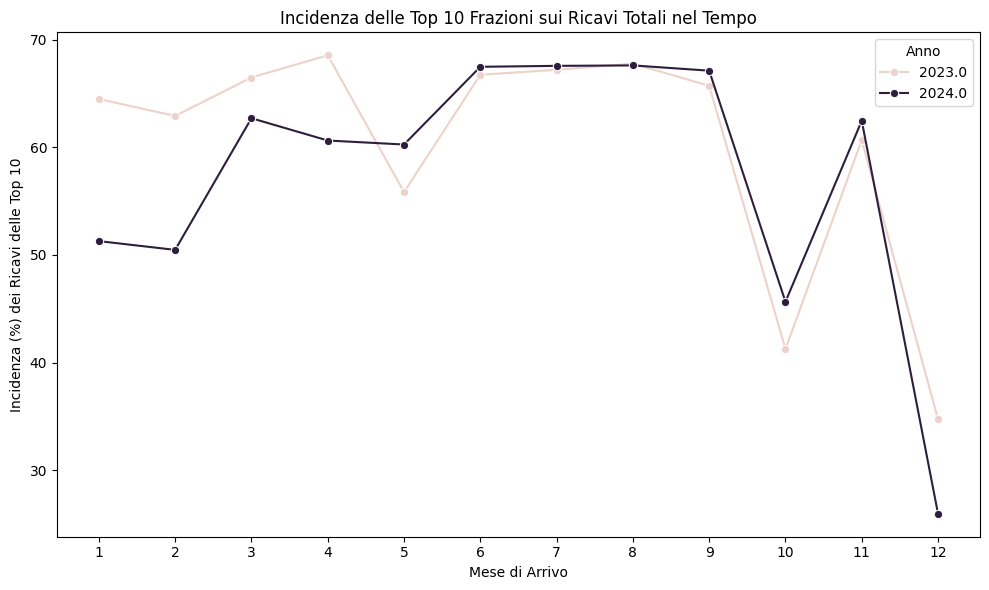

In [20]:
# Calcola i ricavi totali per mese e anno
ricavi_totali = prenotazioni_totali.groupby(['Anno', 'Prenotazione - data arrivo Mese'])['Ricavi'].sum().reset_index()

# Calcola i ricavi per le top 10 frazioni
top_frazioni_ricavi = prenotazioni_totali.groupby('Frazione')['Ricavi'].sum().nlargest(10).index
df_top_frazioni_ricavi = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_frazioni_ricavi)]
ricavi_top_10 = df_top_frazioni_ricavi.groupby(['Anno', 'Prenotazione - data arrivo Mese'])['Ricavi'].sum().reset_index()

# Unisci i due DataFrame sui mesi e anni
ricavi_confronto = pd.merge(ricavi_totali, ricavi_top_10, on=['Anno', 'Prenotazione - data arrivo Mese'], suffixes=('_totali', '_top_10'))

# Calcola la percentuale di incidenza delle top 10 sui ricavi totali
ricavi_confronto['Incidenza (%)'] = (ricavi_confronto['Ricavi_top_10'] / ricavi_confronto['Ricavi_totali']) * 100

# Grafico Lineare: Incidenza delle Top 10 Frazioni sui Ricavi Generali nel Tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=ricavi_confronto, x='Prenotazione - data arrivo Mese', y='Incidenza (%)', hue='Anno', marker='o')
plt.title('Incidenza delle Top 10 Frazioni sui Ricavi Totali nel Tempo')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Incidenza (%) dei Ricavi delle Top 10')
plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x
plt.tight_layout()
plt.show()

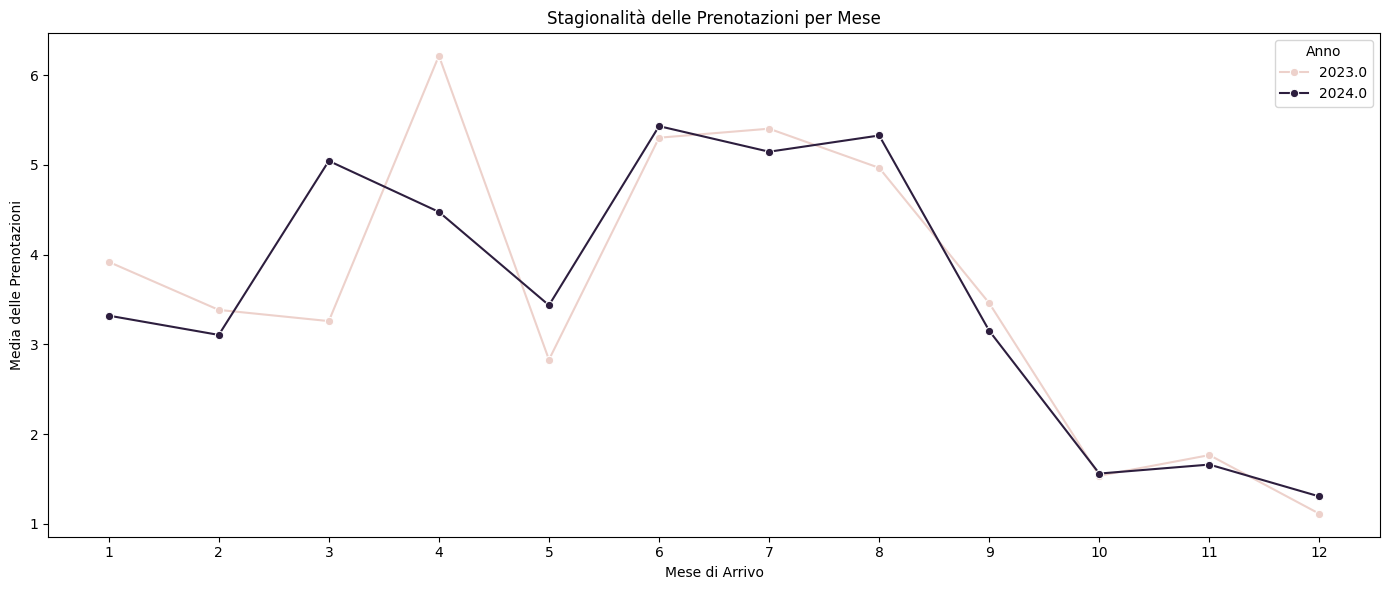

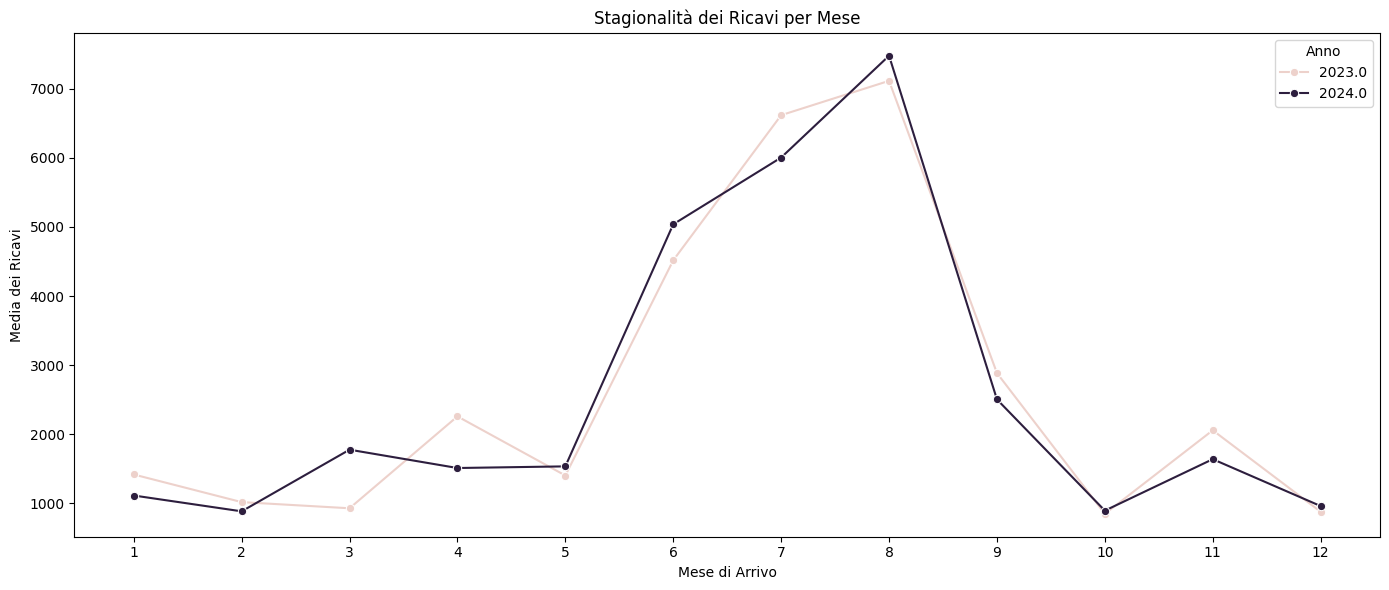

In [21]:
# Calcolo delle medie mensili dei ricavi e prenotazioni
stagionalita = prenotazioni_totali.groupby(['Prenotazione - data arrivo Mese', 'Anno']).agg({
    'Prenotazioni': 'mean',
    'Ricavi': 'mean'
}).reset_index()

# Grafico Lineare: Stagionalità delle Prenotazioni
plt.figure(figsize=(14, 6))
sns.lineplot(data=stagionalita, x='Prenotazione - data arrivo Mese', y='Prenotazioni', hue='Anno', marker='o')
plt.title('Stagionalità delle Prenotazioni per Mese')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Media delle Prenotazioni')
plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x
plt.tight_layout()
plt.show()

# Grafico Lineare: Stagionalità dei Ricavi
plt.figure(figsize=(14, 6))
sns.lineplot(data=stagionalita, x='Prenotazione - data arrivo Mese', y='Ricavi', hue='Anno', marker='o')
plt.title('Stagionalità dei Ricavi per Mese')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Media dei Ricavi')
plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x
plt.tight_layout()
plt.show()


/var/folders/c1/g391tnvs465fkh1wg6gy8p3h0000gn/T/ipykernel_3591/2082606452.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_frazioni_primavera.head(10), x='Frazione', y='Ricavi', palette='viridis')


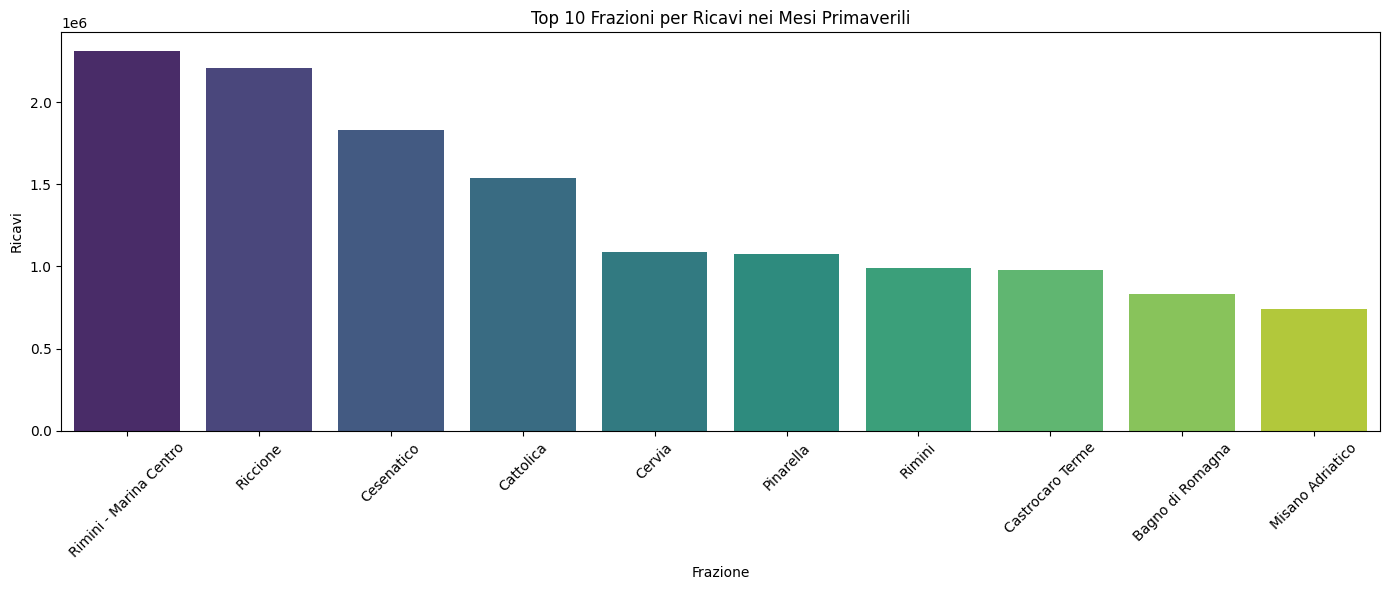

/var/folders/c1/g391tnvs465fkh1wg6gy8p3h0000gn/T/ipykernel_3591/2082606452.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_frazioni_primavera.head(10), x='Frazione', y='Prenotazioni', palette='viridis')


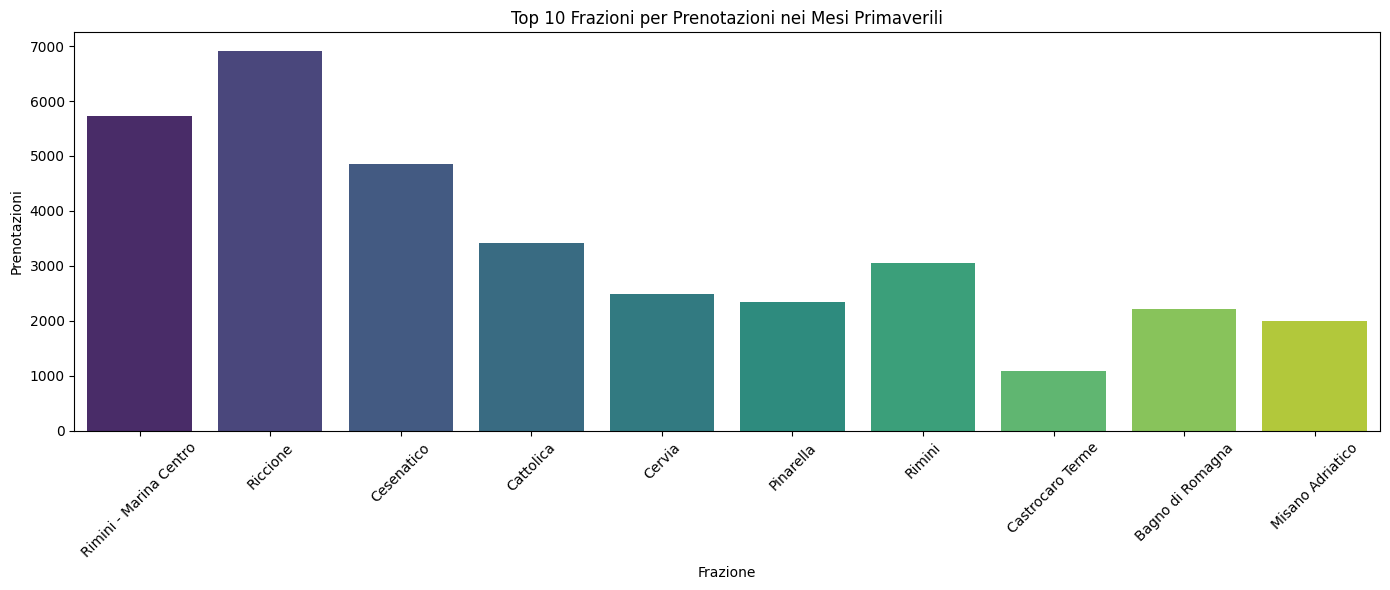

In [22]:
# Filtra i dati per i mesi primaverili (marzo, aprile, maggio)
mesi_primaverili = [3, 4, 5]
dati_primavera = prenotazioni_totali[prenotazioni_totali['Prenotazione - data arrivo Mese'].isin(mesi_primaverili)]

# Calcola le performance per frazione nei mesi primaverili
performance_primavera = dati_primavera.groupby('Frazione').agg({
    'Prenotazioni': 'sum',
    'Ricavi': 'sum'
}).reset_index()

# Ordina per migliori performance in termini di ricavi
top_frazioni_primavera = performance_primavera.sort_values(by='Ricavi', ascending=False)

# Visualizza le prime 10 frazioni per ricavi nei mesi primaverili
plt.figure(figsize=(14, 6))
sns.barplot(data=top_frazioni_primavera.head(10), x='Frazione', y='Ricavi', palette='viridis')
plt.title('Top 10 Frazioni per Ricavi nei Mesi Primaverili')
plt.xlabel('Frazione')
plt.ylabel('Ricavi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizza le prime 10 frazioni per prenotazioni nei mesi primaverili
plt.figure(figsize=(14, 6))
sns.barplot(data=top_frazioni_primavera.head(10), x='Frazione', y='Prenotazioni', palette='viridis')
plt.title('Top 10 Frazioni per Prenotazioni nei Mesi Primaverili')
plt.xlabel('Frazione')
plt.ylabel('Prenotazioni')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

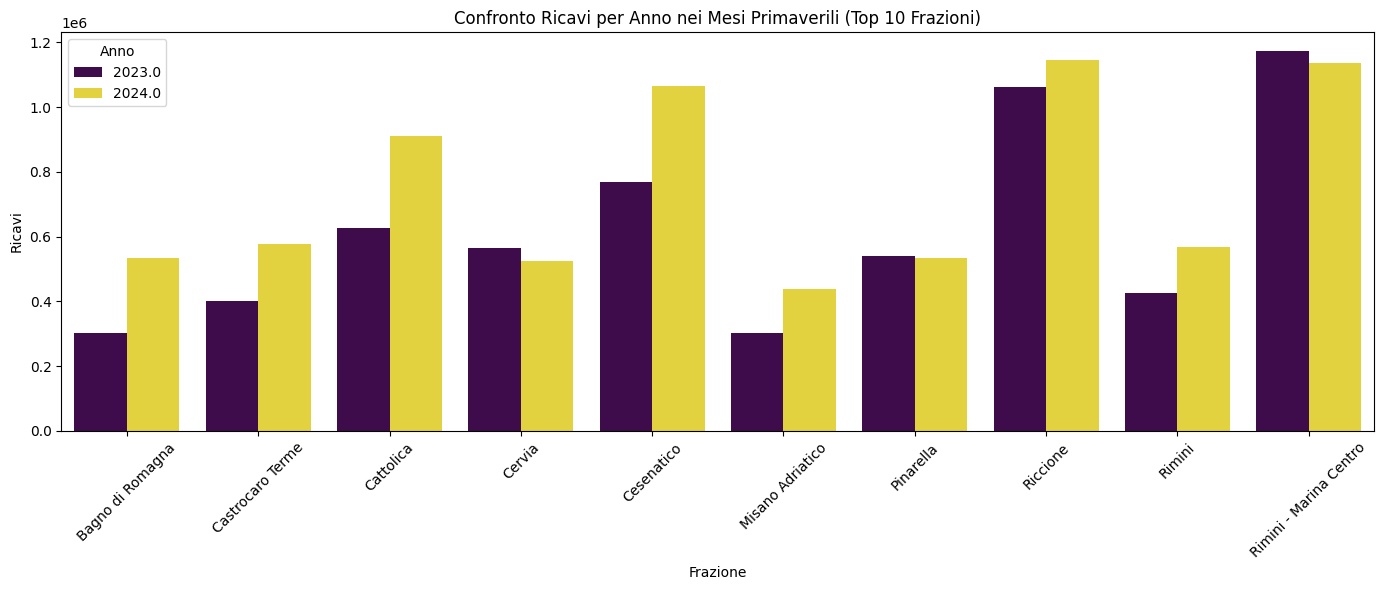

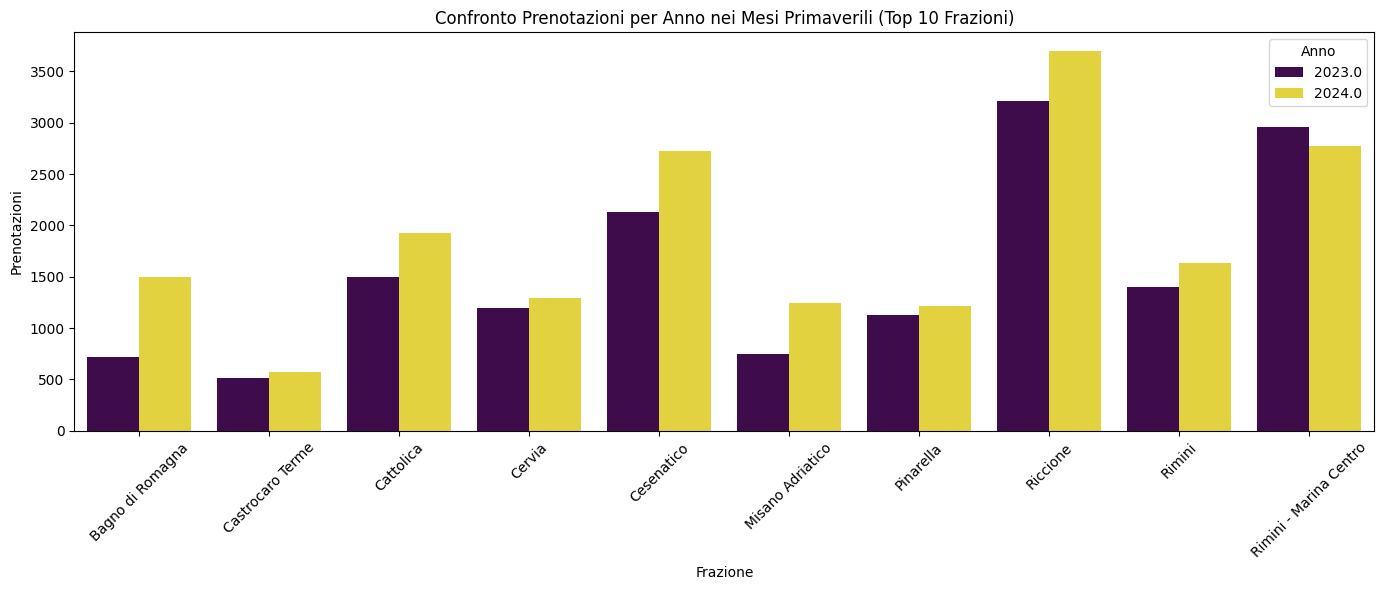

In [23]:
# Filtra i dati per i mesi primaverili (marzo, aprile, maggio)
mesi_primaverili = [3, 4, 5]
dati_primavera = prenotazioni_totali[prenotazioni_totali['Prenotazione - data arrivo Mese'].isin(mesi_primaverili)]

# Calcola le performance per frazione e anno nei mesi primaverili
performance_primavera_anno = dati_primavera.groupby(['Frazione', 'Anno']).agg({
    'Prenotazioni': 'sum',
    'Ricavi': 'sum'
}).reset_index()

# Seleziona le top 10 frazioni basate sui ricavi complessivi
top_frazioni_ricavi = performance_primavera_anno.groupby('Frazione')['Ricavi'].sum().nlargest(10).index
df_top_frazioni_ricavi = performance_primavera_anno[performance_primavera_anno['Frazione'].isin(top_frazioni_ricavi)]

# Grafico per l'andamento dei ricavi anno per anno nei mesi primaverili
plt.figure(figsize=(14, 6))
sns.barplot(data=df_top_frazioni_ricavi, x='Frazione', y='Ricavi', hue='Anno', palette='viridis')
plt.title('Confronto Ricavi per Anno nei Mesi Primaverili (Top 10 Frazioni)')
plt.xlabel('Frazione')
plt.ylabel('Ricavi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico per l'andamento delle prenotazioni anno per anno nei mesi primaverili
plt.figure(figsize=(14, 6))
sns.barplot(data=df_top_frazioni_ricavi, x='Frazione', y='Prenotazioni', hue='Anno', palette='viridis')
plt.title('Confronto Prenotazioni per Anno nei Mesi Primaverili (Top 10 Frazioni)')
plt.xlabel('Frazione')
plt.ylabel('Prenotazioni')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
